In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
color_platette = {
        'Task 1': {
            'learning_rate=0.01': '#20B2AA',
            'learning_rate=0.05': '#FF00FF',
            'learning_rate=0.2':  '#DAA520',
            },
        'Task 2': {
            'Using Scheduler': '#FF7F50',
            'Not Using Scheduler': '#00FF00',
            },
        'Task 3': {
            'weight_decay=1e-4': '#FFB6C1',
            'weight_decay=5e-4': '#e377c2',
        },
        'Task 4': {
            'all_relu': '#4169E1',
            'sigmoid_at_4,5,6,7,8,9,10': '#FF8C00',
        }
    }

def plot_train_loss_curves(train_loss_df,
                           task_ind,
                           save:bool = False,
                           save_dir:str = 'plots/'):
    """
    Plot training loss curves for each epoch.

    Args:
        train_loss_df (pd.DataFrame): DataFrame containing training loss data.
    """
    plt.figure(figsize=(10, 6))
    epochs = train_loss_df.index
    if task_ind == "Task 1":
        for lr in ['learning_rate=0.01', 'learning_rate=0.05', 'learning_rate=0.2']:
            plt.plot(epochs, train_loss_df[f'{lr}_mean'], label=f'{lr}', color=color_platette[task_ind][lr])
            plt.fill_between(
                    epochs,
                    train_loss_df[f'{lr}_min'],
                    train_loss_df[f'{lr}_max'],
                    alpha=0.2,  # 设置区域透明度
                    color=color_platette[task_ind][lr]
                    )
    elif task_ind == "Task 2":
        for scheduler in ['Using Scheduler', 'Not Using Scheduler']:
            plt.plot(epochs, train_loss_df[f'{scheduler}_mean'], label=f'{scheduler}', color=color_platette[task_ind][scheduler])
            plt.fill_between(
                    epochs,
                    train_loss_df[f'{scheduler}_min'],
                    train_loss_df[f'{scheduler}_max'],
                    alpha=0.2,  # 设置区域透明度
                    color=color_platette[task_ind][scheduler]
                    )
    elif task_ind == "Task 3":
        for weight_decay in ['weight_decay=1e-4', 'weight_decay=5e-4']:
            plt.plot(epochs, train_loss_df[f'{weight_decay}_mean'], label=f'{weight_decay}', color=color_platette[task_ind][weight_decay])
            plt.fill_between(
                    epochs,
                    train_loss_df[f'{weight_decay}_min'],
                    train_loss_df[f'{weight_decay}_max'],
                    alpha=0.2,  # 设置区域透明度
                    color=color_platette[task_ind][weight_decay]
                    )
    elif task_ind == "Task 4":
        for activation in ['all_relu', 'sigmoid_at_4,5,6,7,8,9,10']:
            plt.plot(epochs, train_loss_df[f'{activation}_mean'], label=f'{activation}', color=color_platette[task_ind][activation])
            plt.fill_between(
                    epochs,
                    train_loss_df[f'{activation}_min'],
                    train_loss_df[f'{activation}_max'],
                    alpha=0.2,  # 设置区域透明度
                    color=color_platette[task_ind][activation]
                    )

    # plt.title('Training Loss Curves of {}'.format(task_ind))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    if save:
        if save_dir is None:
            raise ValueError("save_path must be provided if save is True.")
        os.makedirs(os.path.dirname(save_dir), exist_ok=True)
        save_path = os.path.join(save_dir, '{}_Train_Loss_curves.pdf'.format(task_ind))
        plt.savefig(save_path)
    else:
        plt.show()
    plt.show()

def plot_val_loss_curves(val_loss_df,
                         task_ind,
                         save:bool = False,
                         save_dir:str = 'plots/'):
    """
    Plot validation loss curves for each epoch.
    Args:
        val_loss_df (pd.DataFrame): DataFrame containing validation loss data.
    """
    plt.figure(figsize=(10, 6))
    for col in val_loss_df.columns:
        plt.plot(val_loss_df[col]*128, label=col, alpha=0.7, color=color_platette[task_ind][col])
    # plt.title('Validation Loss Curves of {}'.format(task_ind))
    plt.xlabel('Epochs')
    plt.xlim(1, len(val_loss_df))
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    if save:
        if save_dir is None:
            raise ValueError("save_path must be provided if save is True.")
        os.makedirs(os.path.dirname(save_dir), exist_ok=True)
        save_path = os.path.join(save_dir, '{}_Val_Loss_curves.pdf'.format(task_ind))
        plt.savefig(save_path)
    else:
        plt.show()


def plot_val_acc_curves(val_acc_df,
                        task_ind,
                        save:bool = False,
                        save_dir:str = 'plots/'):
    """
    Plot validation accuracy curves for each epoch.
    Args:
        val_acc_df (pd.DataFrame): DataFrame containing validation accuracy data.
    """
    plt.figure(figsize=(10, 6))
    for col in val_acc_df.columns:
        plt.plot(val_acc_df[col]*100, label=col, alpha=0.7, color=color_platette[task_ind][col])
    # plt.title('Validation Accuracy Curves of {}'.format(task_ind))
    plt.xlabel('Epochs')
    plt.xlim(1, len(val_acc_df))
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    if save:
        if save_dir is None:
            raise ValueError("save_path must be provided if save is True.")
        os.makedirs(os.path.dirname(save_dir), exist_ok=True)
        save_path = os.path.join(save_dir, '{}_Val_Acc_curves.pdf'.format(task_ind))
        plt.savefig(save_path)
    else:
        plt.show()

def plot_test_acc(test_accuracy_df,
                  task_ind,
                  save:bool = False,
                  save_dir:str = 'plots/'):
    """
    Plot test accuracy for each model.
    Args:
        test_accuracy_df (pd.DataFrame): DataFrame containing test accuracy data.
    """
    plt.figure(figsize=(8, 8))
    for col in test_accuracy_df.columns:
        plt.bar(col, test_accuracy_df[col].values[0]*100, color=color_platette[task_ind][col])
    # plt.title('Test Accuracy of {}'.format(task_ind))
    # plt.xlabel('')
    # add value scaler
    for i, v in enumerate(test_accuracy_df.values[0]*100):
        plt.text(i, v + 0.1, str(round(v, 4)), ha='center', va='bottom', fontsize=10)
    plt.ylabel('Accuracy')
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    if save:
        if save_dir is None:
            raise ValueError("save_path must be provided if save is True.")
        os.makedirs(os.path.dirname(save_dir), exist_ok=True)
        save_path = os.path.join(save_dir, '{}_Test_Acc.pdf'.format(task_ind))
        plt.savefig(save_path)
    else:
        plt.show()

def plot_l2_norm(l2_norm_df,
                task_ind,
                save:bool = False,
                save_dir:str = 'plots/'):
    """
    Plot L2 norm for each model.
    Args:
        l2_norm_df (pd.DataFrame): DataFrame containing L2 norm data.
    """
    plt.figure(figsize=(10, 6))
    epochs = l2_norm_df.index
    for col in ['all_relu', 'sigmoid_at_4,5,6,7,8,9,10']:
        plt.plot(epochs, l2_norm_df[f'{col}_mean'], label=col, alpha=1, color=color_platette[task_ind][col])
        plt.fill_between(
                epochs,
                l2_norm_df[f'{col}_min'],
                l2_norm_df[f'{col}_max'],
                alpha=0.2,  # 设置区域透明度
                color=color_platette[task_ind][col]
                )
    # plt.title('L2 Norm of {}'.format(task_ind))
    plt.xlabel('Epochs')
    # plt.xlim(1, len(l2_norm_df))
    plt.ylabel('L2 Norm')
    plt.legend(loc='upper right')
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    if save:
        if save_dir is None:
            raise ValueError("save_path must be provided if save is True.")
        os.makedirs(os.path.dirname(save_dir), exist_ok=True)
        save_path = os.path.join(save_dir, '{}_Train_l2_norm.pdf'.format(task_ind))
        plt.savefig(save_path)
    else:
        plt.show()

def plot_train_val_loss_curves(train_loss_df,
                               val_loss_df,
                               task_ind,
                               save:bool = False,
                               save_dir:str = 'plots/'):
    """
    Plot training and validation loss curves for each epoch.
    Args:
        train_loss_df (pd.DataFrame): DataFrame containing training loss data.
        val_loss_df (pd.DataFrame): DataFrame containing validation loss data.
    """
    plt.figure(figsize=(10, 6))
    epochs = train_loss_df.index
    if task_ind == "Task 1":
        for lr in ['learning_rate=0.01', 'learning_rate=0.05', 'learning_rate=0.2']:
            plt.plot(epochs, train_loss_df[f'{lr}_mean'], label=f'{lr}_train_loss', color=color_platette[task_ind][lr])
            plt.fill_between(
                    epochs,
                    train_loss_df[f'{lr}_min'],
                    train_loss_df[f'{lr}_max'],
                    alpha=0.2,  # 设置区域透明度
                    color=color_platette[task_ind][lr]
                    )
    elif task_ind == "Task 2":
        for scheduler in ['Using Scheduler', 'Not Using Scheduler']:
            plt.plot(epochs, train_loss_df[f'{scheduler}_mean'], label=f'{scheduler}_train_loss', color=color_platette[task_ind][scheduler])
            plt.fill_between(
                    epochs,
                    train_loss_df[f'{scheduler}_min'],
                    train_loss_df[f'{scheduler}_max'],
                    alpha=0.2,  # 设置区域透明度
                    color=color_platette[task_ind][scheduler]
                    )
    elif task_ind == "Task 3":
        for weight_decay in ['weight_decay=1e-4', 'weight_decay=5e-4']:
            plt.plot(epochs, train_loss_df[f'{weight_decay}_mean'], label=f'{weight_decay}_train_loss', color=color_platette[task_ind][weight_decay])
            plt.fill_between(
                    epochs,
                    train_loss_df[f'{weight_decay}_min'],
                    train_loss_df[f'{weight_decay}_max'],
                    alpha=0.2,  # 设置区域透明度
                    color=color_platette[task_ind][weight_decay]
                    )
    elif task_ind == "Task 4":
        for activation in ['all_relu', 'sigmoid_at_4,5,6,7,8,9,10']:
            plt.plot(epochs, train_loss_df[f'{activation}_mean'], label=f'{activation}_train_loss', color=color_platette[task_ind][activation])
            plt.fill_between(
                    epochs,
                    train_loss_df[f'{activation}_min'],
                    train_loss_df[f'{activation}_max'],
                    alpha=0.2,  # 设置区域透明度
                    color=color_platette[task_ind][activation]
                    )
    for col in val_loss_df.columns:
        plt.plot(epochs, val_loss_df[col]*128, label=col+'_val_loss', alpha=0.7, linestyle='--', color=color_platette[task_ind][col])
    # plt.title('Training and Validation Loss Curves of {}'.format(task_ind))
    plt.xlabel('Epochs')
    plt.xlim(1, len(train_loss_df))
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    if save:
        if save_dir is None:
            raise ValueError("save_path must be provided if save is True.")
        os.makedirs(os.path.dirname(save_dir), exist_ok=True)
        save_path = os.path.join(save_dir, '{}_Train_Val_Loss_curves.pdf'.format(task_ind))
        plt.savefig(save_path)
    else:
        plt.show()

def plot_train_val_acc_curves(train_acc_df,
                              val_acc_df,
                              task_ind,
                              save:bool = False,
                              save_dir:str = 'plots/'):
    """
    Plot training and validation accuracy curves for each epoch.
    Args:
        train_acc_df (pd.DataFrame): DataFrame containing training accuracy data.
        val_acc_df (pd.DataFrame): DataFrame containing validation accuracy data.
    """
    plt.figure(figsize=(10, 6))
    epochs = train_acc_df.index
    if task_ind == "Task 1":
        for lr in ['learning_rate=0.01', 'learning_rate=0.05', 'learning_rate=0.2']:
            plt.plot(epochs, train_acc_df[f'{lr}_mean']*100, label=f'{lr}_train_acc', color=color_platette[task_ind][lr])
            plt.fill_between(
                    epochs,
                    train_acc_df[f'{lr}_min']*100,
                    train_acc_df[f'{lr}_max']*100,
                    alpha=0.2,  # 设置区域透明度
                    color=color_platette[task_ind][lr]
                    )
    elif task_ind == "Task 2":
        for scheduler in ['Using Scheduler', 'Not Using Scheduler']:
            plt.plot(epochs, train_acc_df[f'{scheduler}_mean']*100, label=f'{scheduler}_train_acc', color=color_platette[task_ind][scheduler])
            plt.fill_between(
                    epochs,
                    train_acc_df[f'{scheduler}_min']*100,
                    train_acc_df[f'{scheduler}_max']*100,
                    alpha=0.2,  # 设置区域透明度
                    color=color_platette[task_ind][scheduler]
                    )
    elif task_ind == "Task 3":
        for weight_decay in ['weight_decay=1e-4', 'weight_decay=5e-4']:
            plt.plot(epochs, train_acc_df[f'{weight_decay}_mean']*100, label=f'{weight_decay}_train_acc', color=color_platette[task_ind][weight_decay])
            plt.fill_between(
                    epochs,
                    train_acc_df[f'{weight_decay}_min']*100,
                    train_acc_df[f'{weight_decay}_max']*100,
                    alpha=0.2,  # 设置区域透明度
                    color=color_platette[task_ind][weight_decay]
                    )
    elif task_ind == "Task 4":
        for activation in ['all_relu', 'sigmoid_at_4,5,6,7,8,9,10']:
            plt.plot(epochs, train_acc_df[f'{activation}_mean']*100, label=f'{activation}_train_acc', color=color_platette[task_ind][activation])
            plt.fill_between(
                    epochs,
                    train_acc_df[f'{activation}_min']*100,
                    train_acc_df[f'{activation}_max']*100,
                    alpha=0.2,  # 设置区域透明度
                    color=color_platette[task_ind][activation]
                    )
    for col in val_acc_df.columns:
        plt.plot(epochs, val_acc_df[col]*100, label=col+'_val_acc', alpha=0.7, linestyle='--', color=color_platette[task_ind][col])
    # plt.title('Training and Validation Accuracy Curves of {}'.format(task_ind))
    plt.xlabel('Epochs')
    plt.xlim(1, len(train_acc_df))
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    if save:
        if save_dir is None:
            raise ValueError("save_path must be provided if save is True.")
        os.makedirs(os.path.dirname(save_dir), exist_ok=True)
        save_path = os.path.join(save_dir, '{}_Train_Val_Acc_curves.pdf'.format(task_ind))
        plt.savefig(save_path)
    else:
        plt.show()

# Task 1 - Learning rate

Identify 3 learning rate:

- 0.01
- 0.05
- 0.2

In [25]:
task1_train_loss_df = pd.read_csv('experiment_result/Task 1 - Train_loss_epoch.csv', index_col=0)
task1_train_loss_df = task1_train_loss_df.iloc[:, [3, 4, 5, 9, 10, 11, 15, 16, 17]]
task1_train_loss_df.columns = ['learning_rate=0.2_mean', 'learning_rate=0.2_min', 'learning_rate=0.2_max',
                               'learning_rate=0.01_mean', 'learning_rate=0.01_min', 'learning_rate=0.01_max',
                               'learning_rate=0.05_mean', 'learning_rate=0.05_min', 'learning_rate=0.05_max']
task1_val_loss_df = pd.read_csv('experiment_result/Task 1 - Val_loss.csv', index_col=0)
task1_val_loss_df = task1_val_loss_df.iloc[:, [3, 9, 15]]
task1_val_loss_df.columns = ['learning_rate=0.2', 'learning_rate=0.01', 'learning_rate=0.05']

task1_train_accuracy_df = pd.read_csv('experiment_result/Task 1 - Train_Accuracy.csv', index_col=0)
task1_train_accuracy_df = task1_train_accuracy_df.iloc[:, [3, 4, 5, 9, 10, 11, 15, 16, 17]]
task1_train_accuracy_df.columns = ['learning_rate=0.2_mean', 'learning_rate=0.2_min', 'learning_rate=0.2_max',
                                   'learning_rate=0.01_mean', 'learning_rate=0.01_min', 'learning_rate=0.01_max',
                                   'learning_rate=0.05_mean', 'learning_rate=0.05_min', 'learning_rate=0.05_max']
task1_val_accuracy_df = pd.read_csv('experiment_result/Task 1 - Val_Accuracy.csv', index_col=0)
task1_val_accuracy_df = task1_val_accuracy_df.iloc[:, [3, 9, 15]]
task1_val_accuracy_df.columns = ['learning_rate=0.2', 'learning_rate=0.01', 'learning_rate=0.05']


task1_test_accuracy_df = pd.read_csv('experiment_result/Task 1 - Test_Accuracy.csv')
task1_test_accuracy_df = task1_test_accuracy_df.iloc[:, [1, 4, 7]]
task1_test_accuracy_df.columns = ['learning_rate=0.2', 'learning_rate=0.01', 'learning_rate=0.05']

In [26]:
task1_train_accuracy_df

,learning_rate=0.2_mean,learning_rate=0.2_min,learning_rate=0.2_max,learning_rate=0.01_mean,learning_rate=0.01_min,learning_rate=0.01_max,learning_rate=0.05_mean,learning_rate=0.05_min,learning_rate=0.05_max
epoch,,,,,,,,,
1,0.055425,0.055425,0.055425,0.038575,0.038575,0.038575,0.063475,0.063475,0.063475
2,0.114175,0.114175,0.114175,0.101425,0.101425,0.101425,0.128200,0.128200,0.128200
3,0.155625,0.155625,0.155625,0.150150,0.150150,0.150150,0.178800,0.178800,0.178800
4,0.195900,0.195900,0.195900,0.189625,0.189625,0.189625,0.221150,0.221150,0.221150
5,0.231025,0.231025,0.231025,0.223950,0.223950,0.223950,0.261450,0.261450,0.261450
6,0.269275,0.269275,0.269275,0.251725,0.251725,0.251725,0.296000,0.296000,0.296000
7,0.309525,0.309525,0.309525,0.283950,0.283950,0.283950,0.332100,0.332100,0.332100
8,0.334300,0.334300,0.334300,0.306400,0.306400,0.306400,0.358075,0.358075,0.358075
9,0.365625,0.365625,0.365625,0.330750,0.330750,0.330750,0.387925,0.387925,0.387925


### plotting

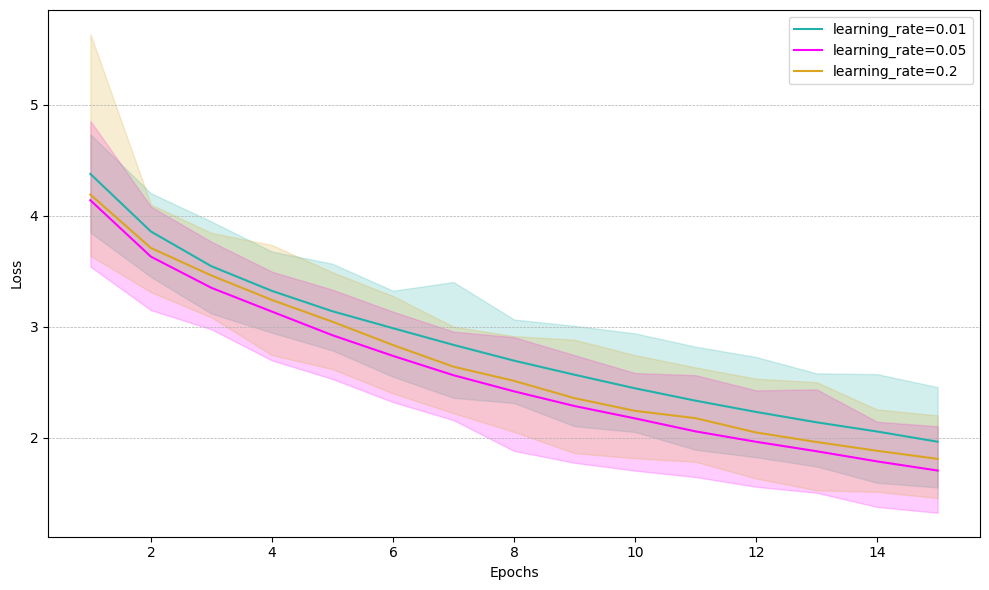

In [31]:
plot_train_loss_curves(task1_train_loss_df,
                       task_ind='Task 1',
                       save=True,
                       save_dir='plots/')

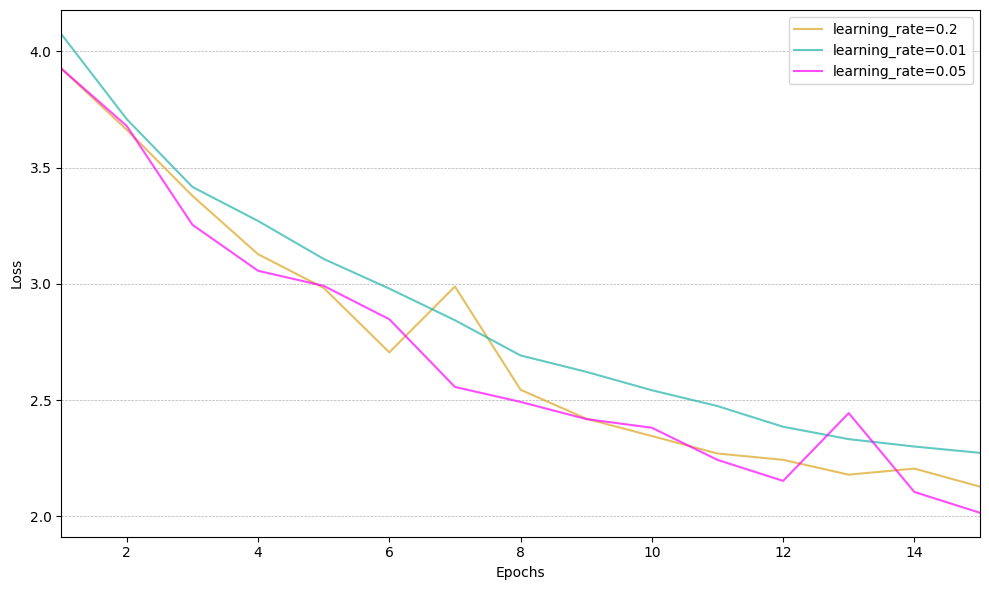

In [32]:
plot_val_loss_curves(task1_val_loss_df,
                     task_ind='Task 1',
                     save=True,
                     save_dir='plots/')

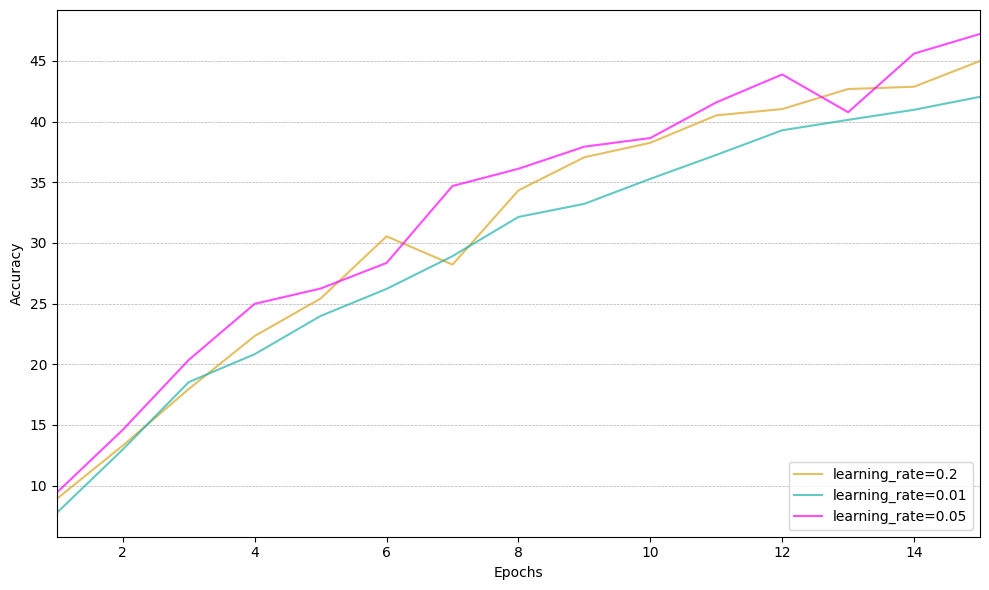

In [33]:
plot_val_acc_curves(task1_val_accuracy_df,
                   task_ind='Task 1',
                   save=True,
                   save_dir='plots/')

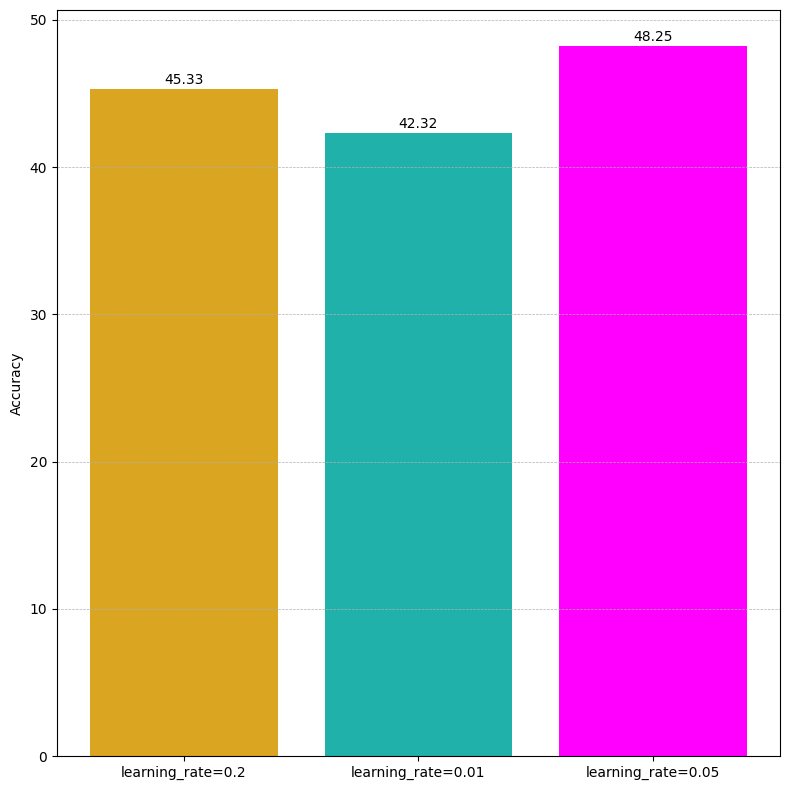

In [36]:
plot_test_acc(task1_test_accuracy_df,
              task_ind='Task 1',
              save=True,
              save_dir='plots/')

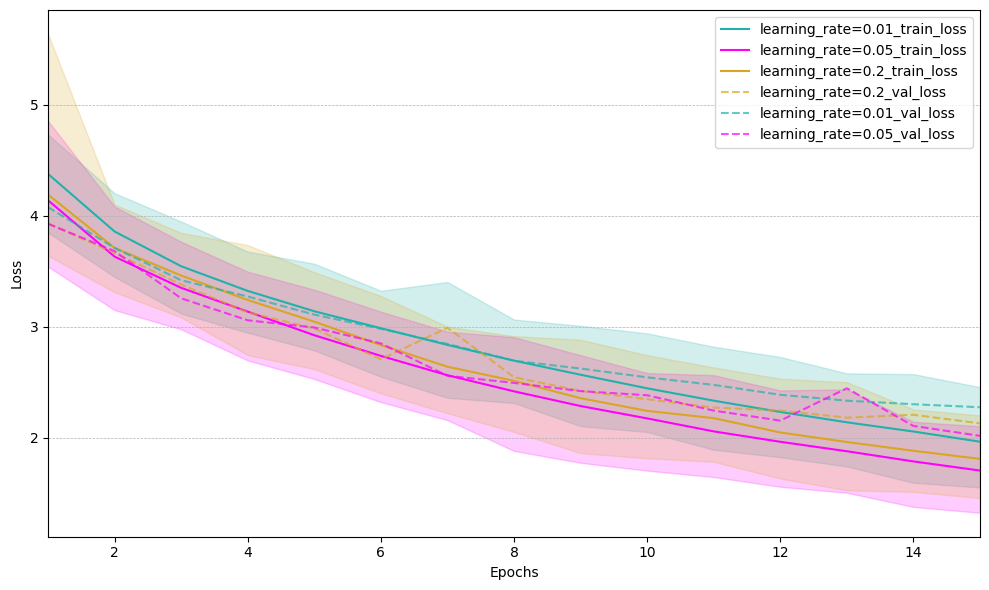

In [37]:
plot_train_val_loss_curves(task1_train_loss_df,
                           task1_val_loss_df,
                           task_ind='Task 1',
                           save=True,
                           save_dir='plots/')

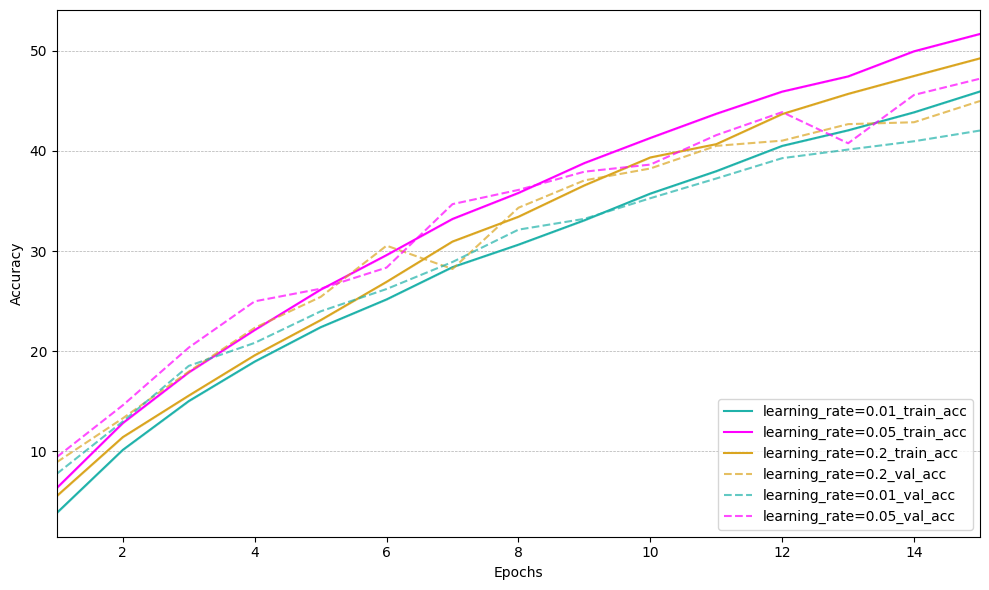

In [64]:
plot_train_val_acc_curves(task1_train_accuracy_df,
                          task1_val_accuracy_df,
                          task_ind='Task 1',
                          save=True,
                          save_dir='plots/')

# Task 2 - Learning Rate Scheduler

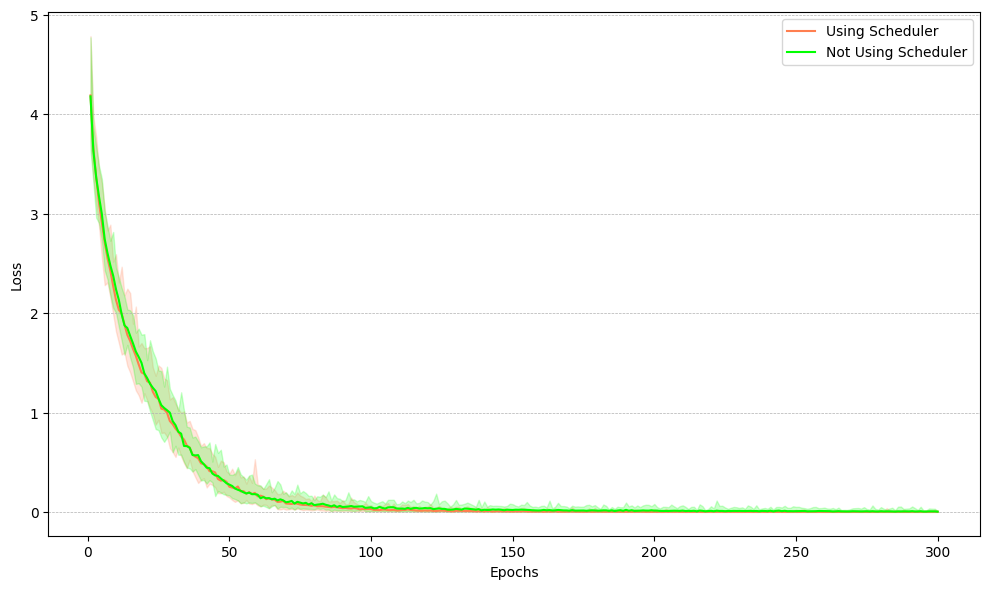

In [46]:
task2_train_loss_df = pd.read_csv('experiment_result/Task 2 - Train_loss_epoch.csv', index_col=0)
task2_train_loss_df = task2_train_loss_df.iloc[:, [3, 4, 5, 9, 10, 11]]
task2_train_loss_df.columns = ['Using Scheduler_mean', 'Using Scheduler_min', 'Using Scheduler_max',
                               'Not Using Scheduler_mean', 'Not Using Scheduler_min', 'Not Using Scheduler_max']
plot_train_loss_curves(task2_train_loss_df,
                       task_ind='Task 2',
                       save=True,
                       save_dir='plots/')
# task2_train_loss_df

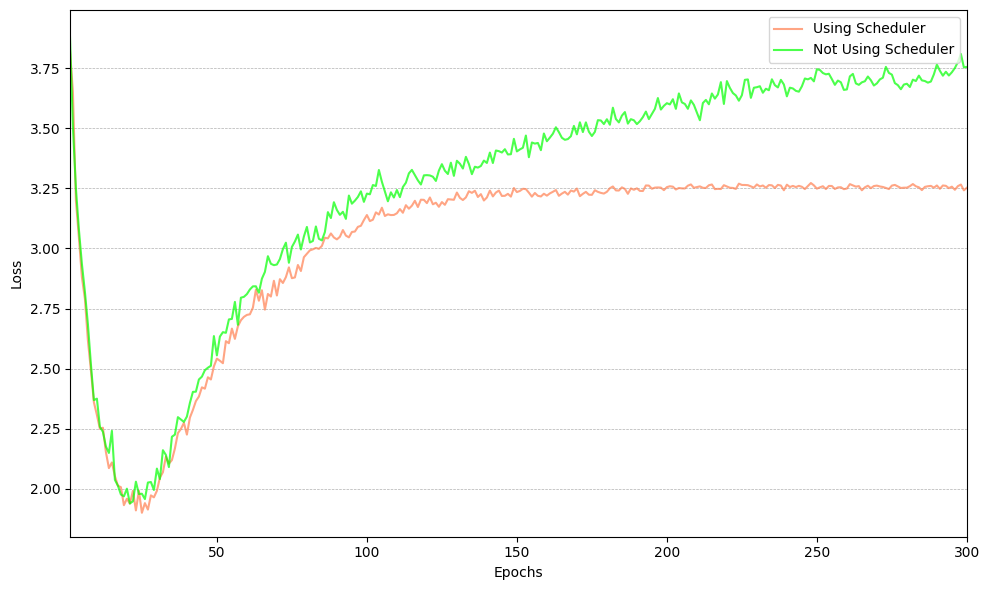

In [47]:
task2_val_loss_df = pd.read_csv('experiment_result/Task 2 - Val_Average Loss.csv', index_col=0)
task2_val_loss_df = task2_val_loss_df.iloc[:, [3, 9]]
task2_val_loss_df.columns = ['Using Scheduler', 'Not Using Scheduler']
plot_val_loss_curves(task2_val_loss_df,
                     task_ind='Task 2',
                     save=True,
                     save_dir='plots/')

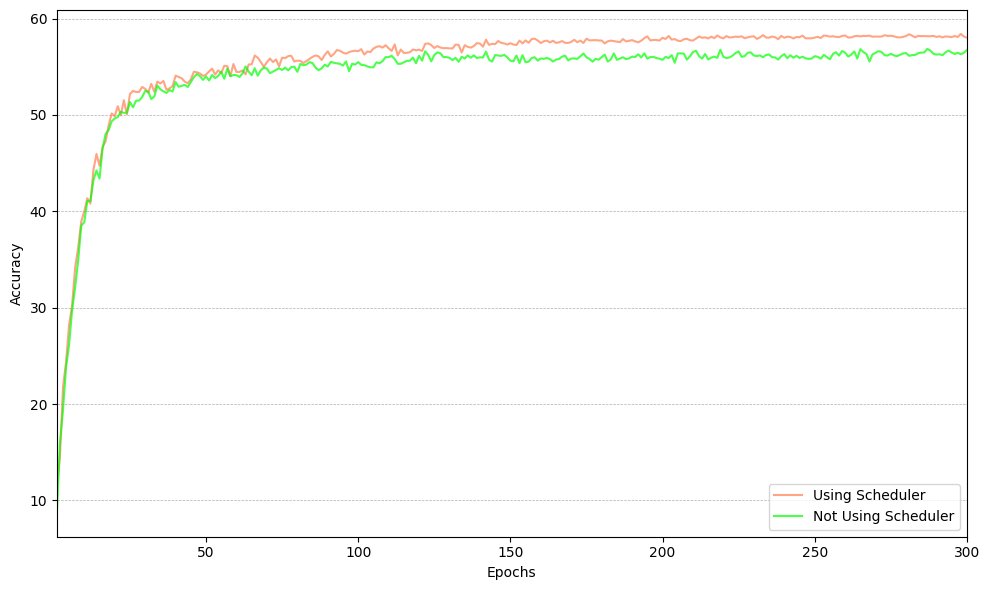

In [48]:
task2_val_accuracy_df = pd.read_csv('experiment_result/Task 2 - Val_Accuracy.csv', index_col=0)
task2_val_accuracy_df = task2_val_accuracy_df.iloc[:, [3, 9]]
task2_val_accuracy_df.columns = ['Using Scheduler', 'Not Using Scheduler']
plot_val_acc_curves(task2_val_accuracy_df,
                   task_ind='Task 2',
                   save=True,
                   save_dir='plots/')

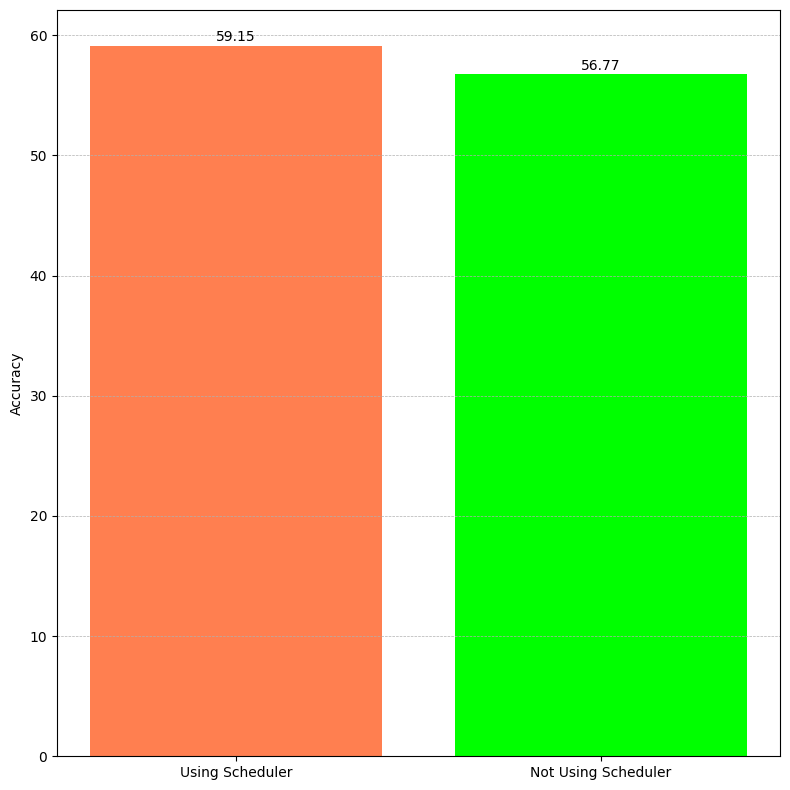

In [49]:
task2_test_accuracy_df = pd.read_csv('experiment_result/Task 2 - Test_Accuracy.csv')
task2_test_accuracy_df = task2_test_accuracy_df.iloc[:, [1, 4]]
task2_test_accuracy_df.columns = ['Using Scheduler', 'Not Using Scheduler']
task2_test_accuracy_df.iloc[0,0] = task2_test_accuracy_df.iloc[1,0]
# task2_test_accuracy_df.iloc[1,0] = task2_test_accuracy_df.iloc[0,0]
task2_test_accuracy_df = task2_test_accuracy_df.iloc[[0]]
plot_test_acc(task2_test_accuracy_df,
              task_ind='Task 2',
              save=True,
              save_dir='plots/')

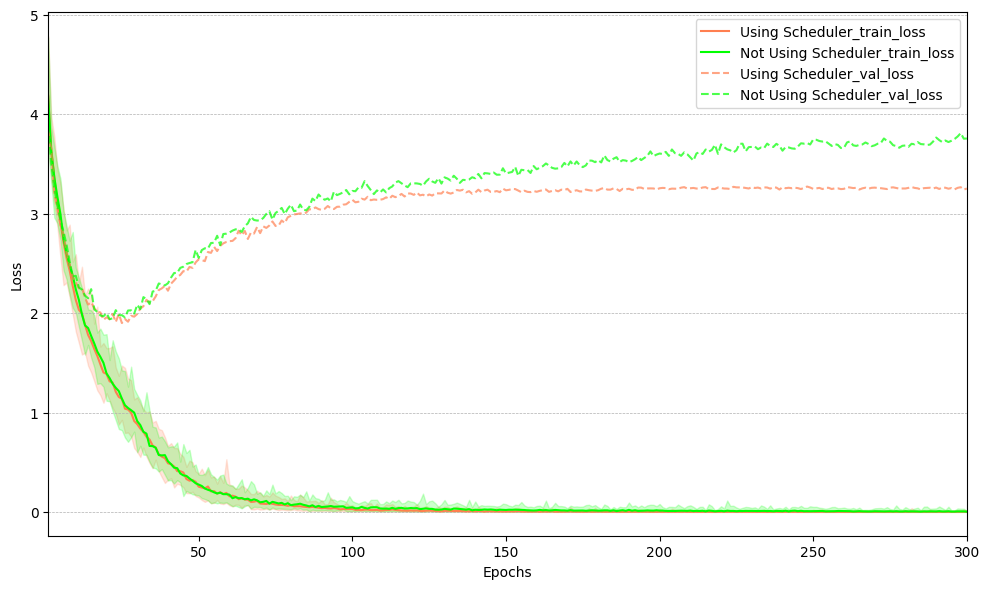

In [50]:
plot_train_val_loss_curves(task2_train_loss_df,
                           task2_val_loss_df,
                           task_ind='Task 2',
                           save=True,
                           save_dir='plots/')

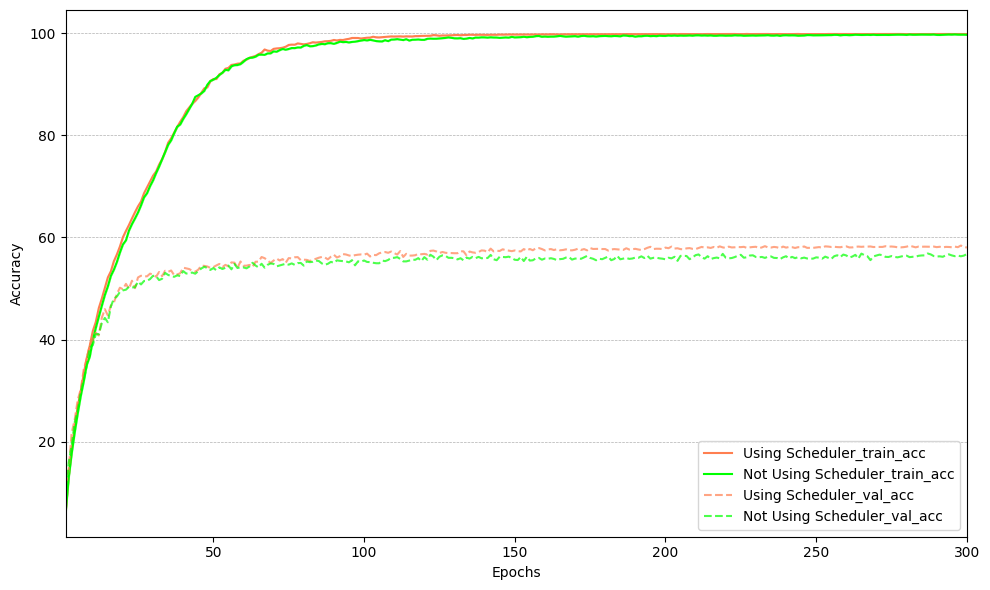

In [65]:
task2_train_accuracy_df = pd.read_csv('experiment_result/Task 2 - Train_Accuracy.csv', index_col=0)
task2_train_accuracy_df = task2_train_accuracy_df.iloc[:, [3, 4, 5, 9, 10, 11]]
task2_train_accuracy_df.columns = ['Using Scheduler_mean', 'Using Scheduler_min', 'Using Scheduler_max',
                                    'Not Using Scheduler_mean', 'Not Using Scheduler_min', 'Not Using Scheduler_max']
plot_train_val_acc_curves(task2_train_accuracy_df,
                          task2_val_accuracy_df,
                          task_ind='Task 2',
                          save=True,
                          save_dir='plots/')

# Task 3 Weight Decay

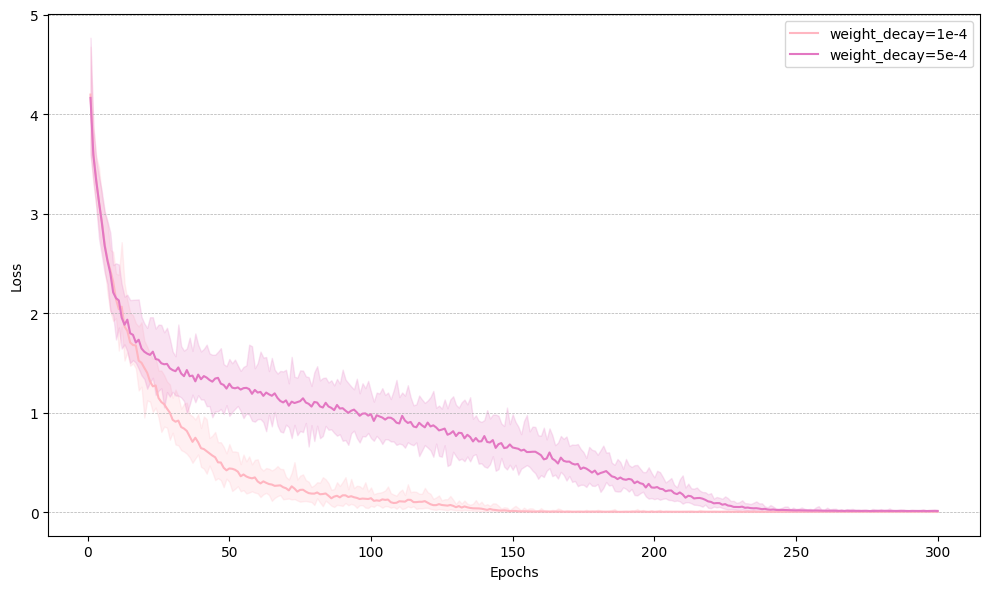

In [57]:
task3_train_loss_df = pd.read_csv('experiment_result/Task 3 - Train_loss_epoch.csv', index_col=0)
task3_train_loss_df = task3_train_loss_df.iloc[:, [3, 4, 5, 9, 10, 11]]
task3_train_loss_df.columns = ['weight_decay=5e-4_mean', 'weight_decay=5e-4_min', 'weight_decay=5e-4_max',
                               'weight_decay=1e-4_mean', 'weight_decay=1e-4_min', 'weight_decay=1e-4_max']
plot_train_loss_curves(task3_train_loss_df,
                       task_ind='Task 3',
                       save=True,
                       save_dir='plots/')
# task3_train_loss_df

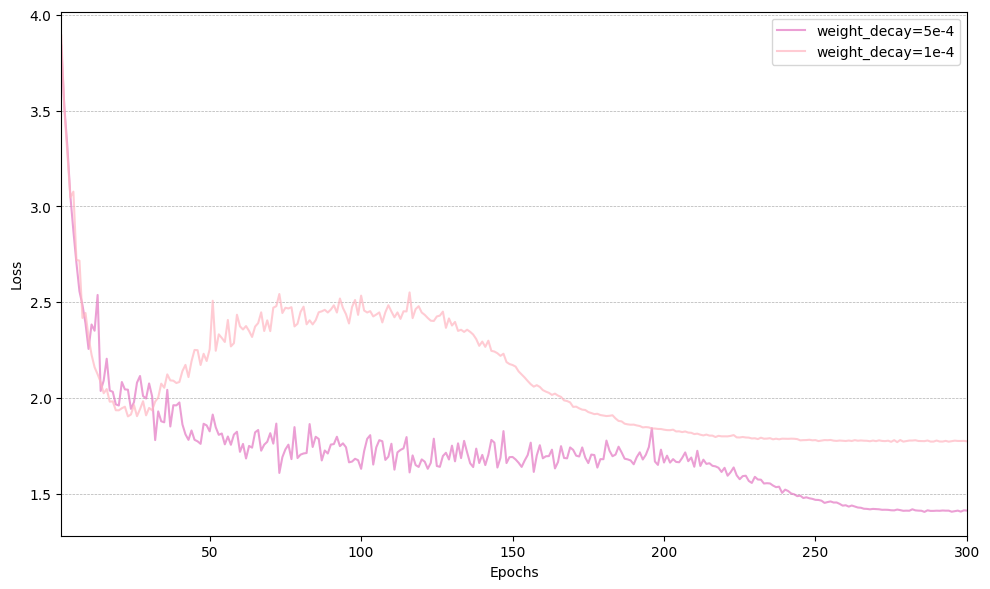

In [56]:
task3_val_loss_df = pd.read_csv('experiment_result/Task 3 - Val_Average Loss.csv', index_col=0)
task3_val_loss_df = task3_val_loss_df.iloc[:, [3, 9]]
task3_val_loss_df.columns = ['weight_decay=5e-4', 'weight_decay=1e-4']
plot_val_loss_curves(task3_val_loss_df,
                     task_ind='Task 3',
                     save=True,
                     save_dir='plots/')

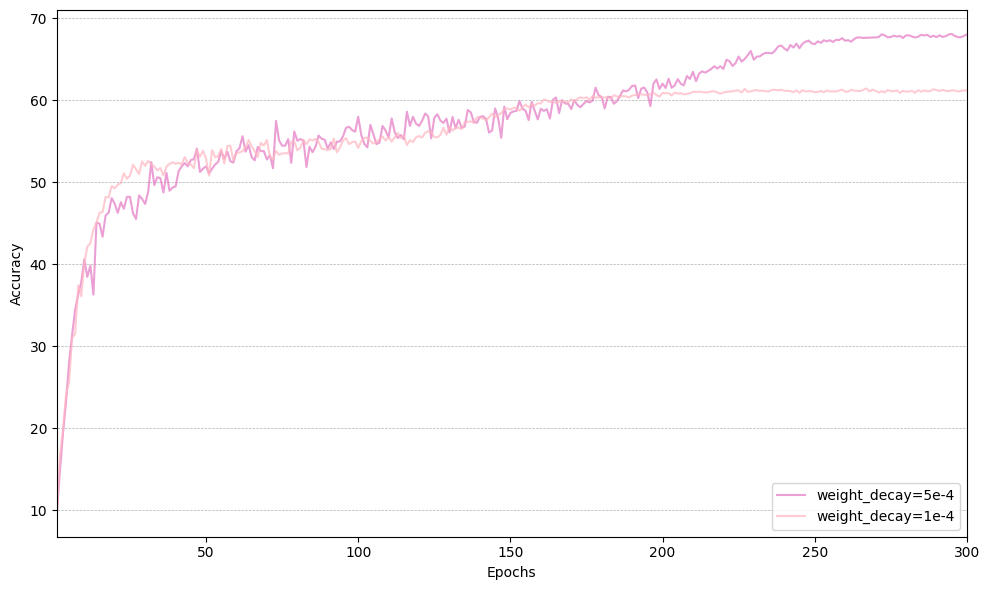

In [58]:
task3_val_accuracy_df = pd.read_csv('experiment_result/Task 3 - Val_Accuracy.csv', index_col=0)
task3_val_accuracy_df = task3_val_accuracy_df.iloc[:, [3, 9]]
task3_val_accuracy_df.columns = ['weight_decay=5e-4', 'weight_decay=1e-4']
plot_val_acc_curves(task3_val_accuracy_df,
                   task_ind='Task 3',
                   save=True,
                   save_dir='plots/')

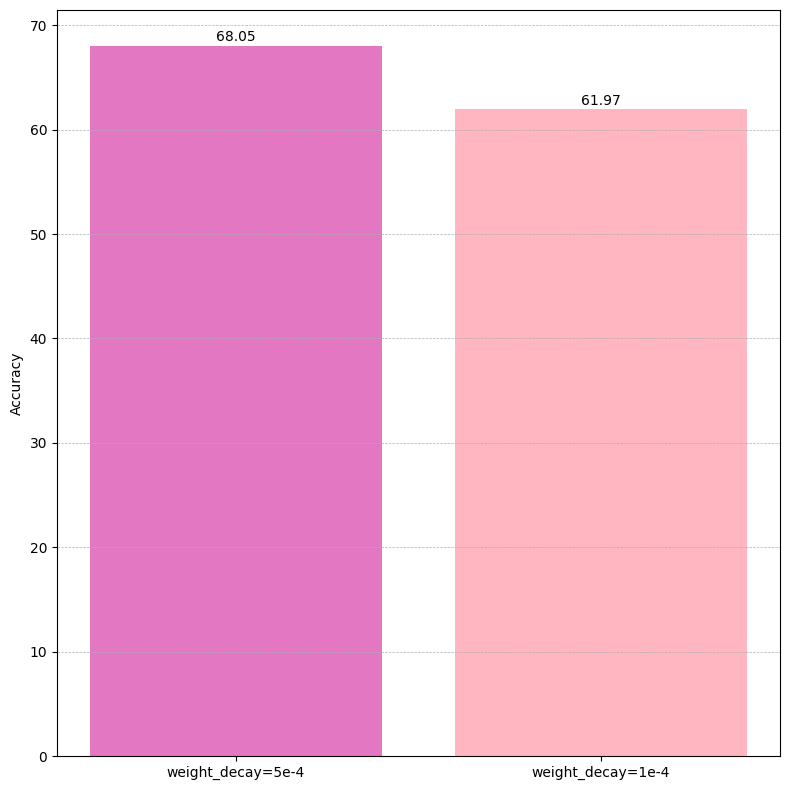

In [60]:
task3_test_accuracy_df = pd.read_csv('experiment_result/Task 3 - Test_Accuracy.csv')
task3_test_accuracy_df = task3_test_accuracy_df.iloc[:, [1, 4]]
task3_test_accuracy_df.columns = ['weight_decay=5e-4', 'weight_decay=1e-4']
plot_test_acc(task3_test_accuracy_df,
              task_ind='Task 3',
              save=True,
              save_dir='plots/')

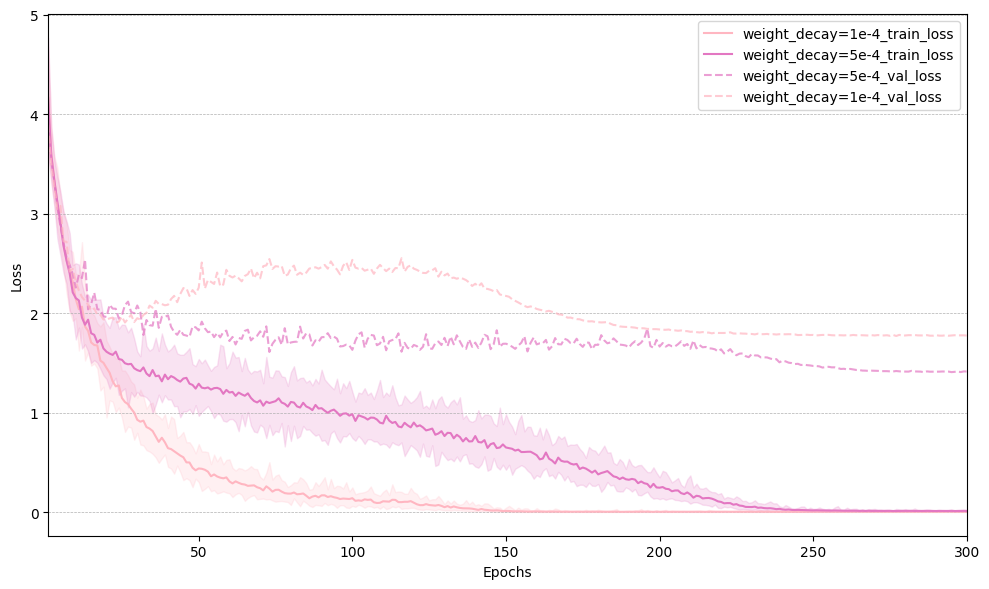

In [61]:
plot_train_val_loss_curves(task3_train_loss_df,
                           task3_val_loss_df,
                           task_ind='Task 3',
                           save=True,
                           save_dir='plots/')

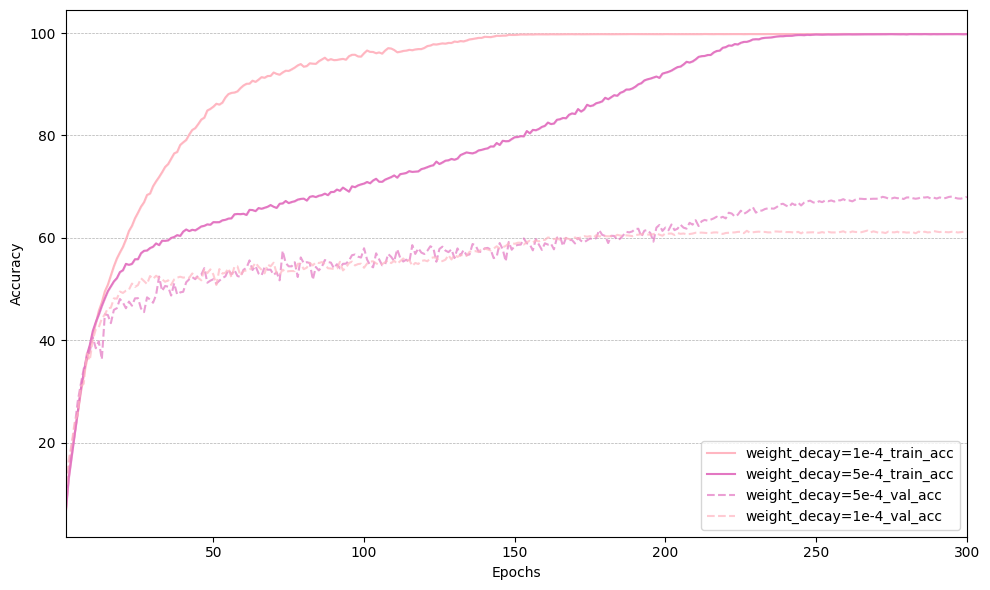

In [66]:
task3_train_accuracy_df = pd.read_csv('experiment_result/Task 3 - Train_Accuracy.csv', index_col=0)
task3_train_accuracy_df = task3_train_accuracy_df.iloc[:, [3, 4, 5, 9, 10, 11]]
task3_train_accuracy_df.columns = ['weight_decay=5e-4_mean', 'weight_decay=5e-4_min', 'weight_decay=5e-4_max',
                                    'weight_decay=1e-4_mean', 'weight_decay=1e-4_min', 'weight_decay=1e-4_max']
plot_train_val_acc_curves(task3_train_accuracy_df,
                          task3_val_accuracy_df,
                          task_ind='Task 3',
                          save=True,
                          save_dir='plots/')

# Task 4 - Activation Function

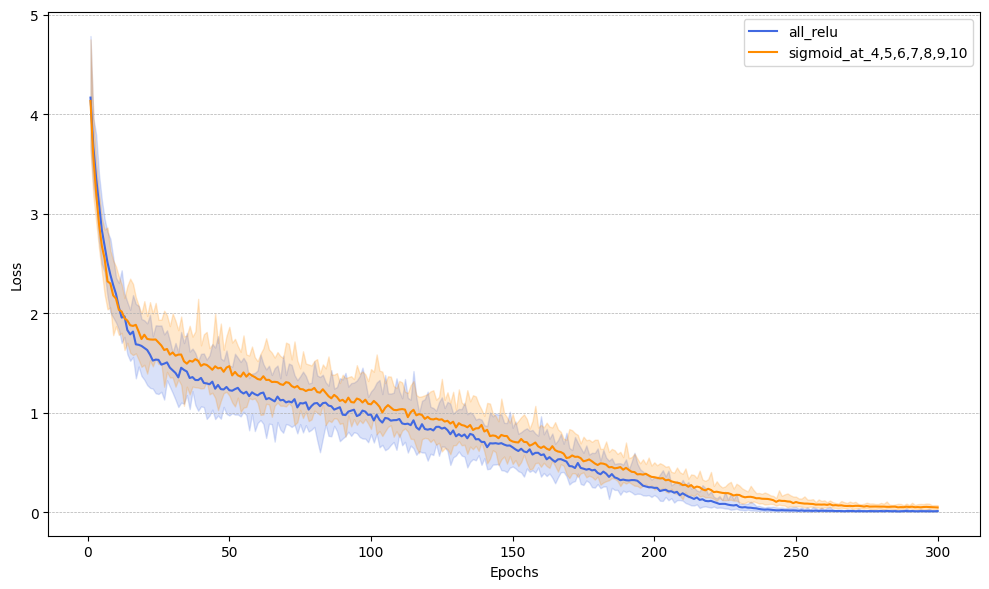

In [76]:
task4_train_loss_df = pd.read_csv('experiment_result/Task 4 - Train_loss_epoch.csv', index_col=0)
task4_train_loss_df = task4_train_loss_df.iloc[:, [3, 4, 5, 9, 10, 11]]
task4_train_loss_df.columns = ['all_relu_mean', 'all_relu_min', 'all_relu_max',
                               'sigmoid_at_4,5,6,7,8,9,10_mean', 'sigmoid_at_4,5,6,7,8,9,10_min', 'sigmoid_at_4,5,6,7,8,9,10_max']
plot_train_loss_curves(task4_train_loss_df,
                       task_ind='Task 4',
                       save=True,
                       save_dir='plots/')

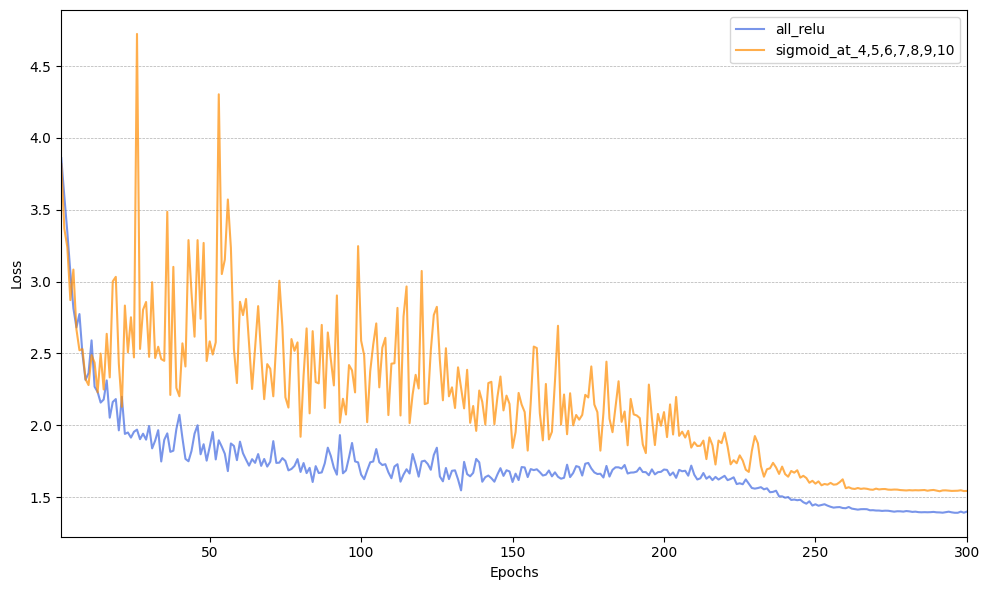

In [79]:
task4_val_loss_df = pd.read_csv('experiment_result/Task 4 - Val_Average Loss.csv', index_col=0)
task4_val_loss_df = task4_val_loss_df.iloc[:, [3, 9]]
task4_val_loss_df.columns = ['all_relu', 'sigmoid_at_4,5,6,7,8,9,10']
plot_val_loss_curves(task4_val_loss_df,
                     task_ind='Task 4',
                     save=True,
                     save_dir='plots/')

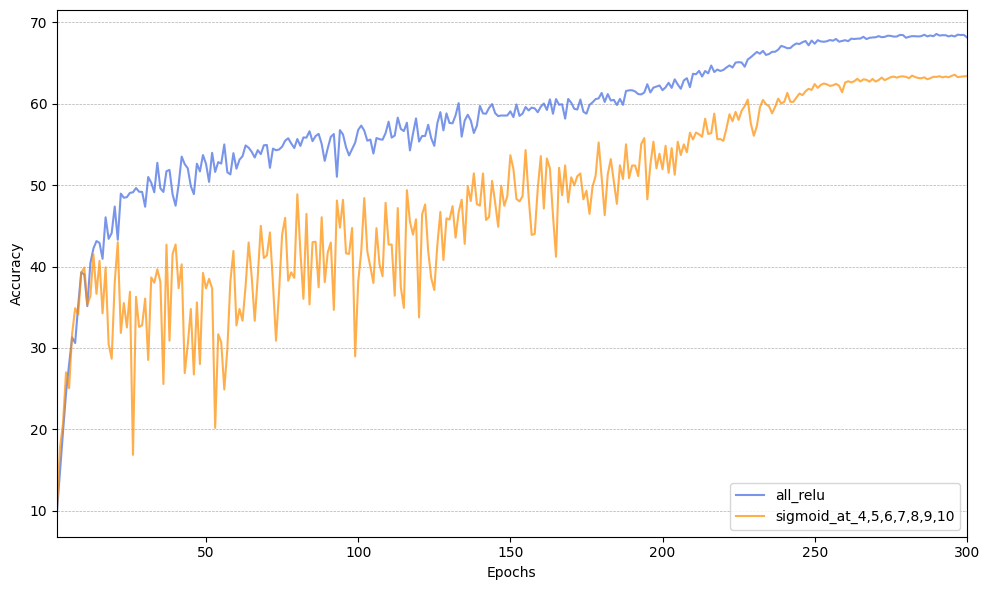

In [80]:
task4_val_accuracy_df = pd.read_csv('experiment_result/Task 4 - Val_Accuracy.csv', index_col=0)
task4_val_accuracy_df = task4_val_accuracy_df.iloc[:, [3, 9]]
task4_val_accuracy_df.columns = ['all_relu', 'sigmoid_at_4,5,6,7,8,9,10']
plot_val_acc_curves(task4_val_accuracy_df,
                   task_ind='Task 4',
                   save=True,
                   save_dir='plots/')

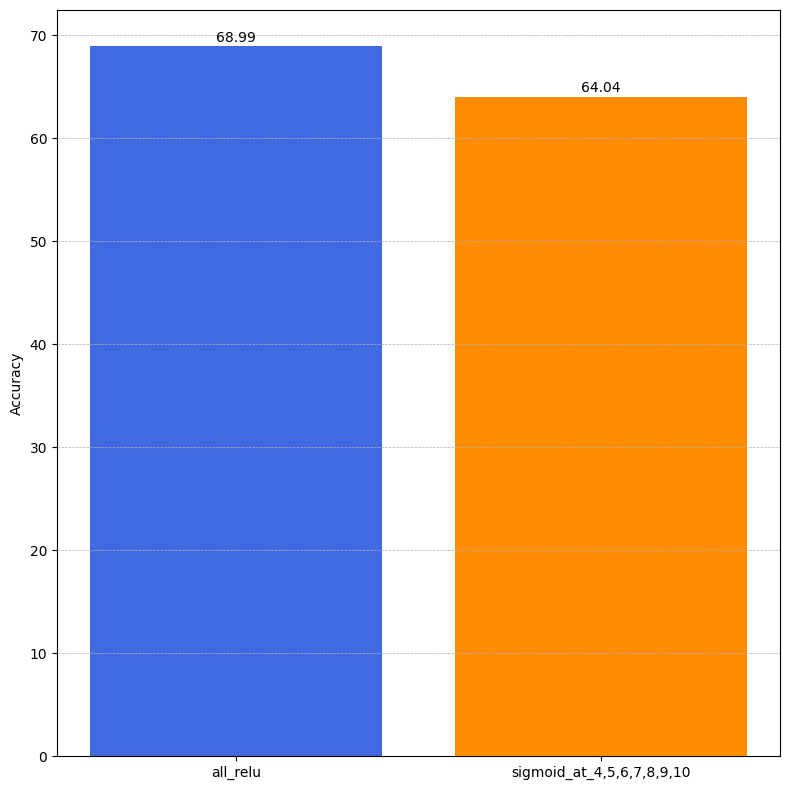

In [81]:
task4_test_accuracy_df = pd.read_csv('experiment_result/Task 4 - Test_Accuracy.csv')
task4_test_accuracy_df = task4_test_accuracy_df.iloc[:, [1, 4]]
task4_test_accuracy_df.columns = ['all_relu', 'sigmoid_at_4,5,6,7,8,9,10']
plot_test_acc(task4_test_accuracy_df,
              task_ind='Task 4',
              save=True,
              save_dir='plots/')

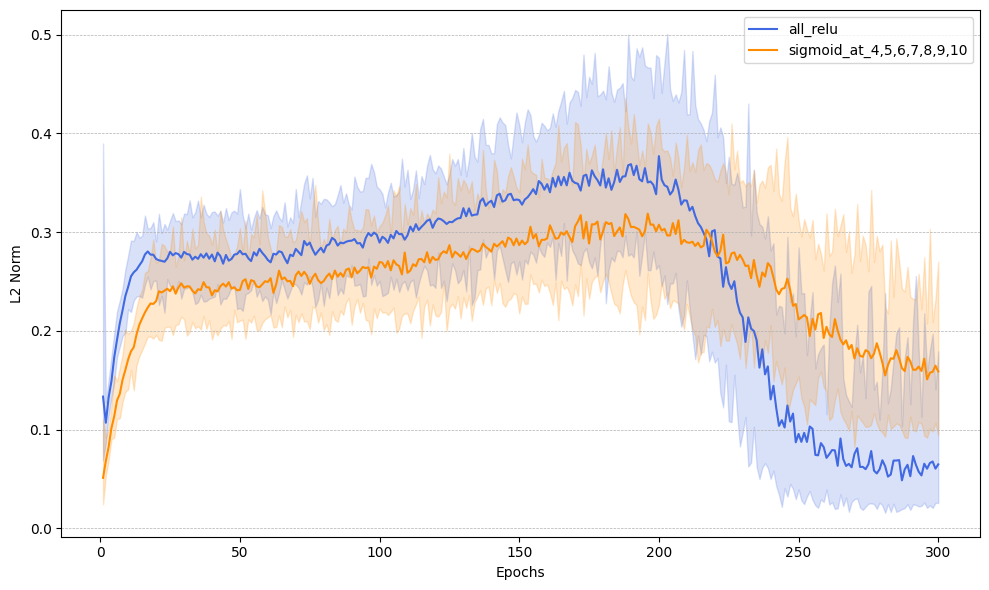

In [82]:
task4_train_l2_norm_df = pd.read_csv('experiment_result/Task 4 - Train_weight_grad_norm.csv', index_col=0)
task4_train_l2_norm_df = task4_train_l2_norm_df.iloc[:, [3, 4, 5, 9, 10, 11]]
task4_train_l2_norm_df.columns = ['all_relu_mean', 'all_relu_min', 'all_relu_max',
                                  'sigmoid_at_4,5,6,7,8,9,10_mean', 'sigmoid_at_4,5,6,7,8,9,10_min', 'sigmoid_at_4,5,6,7,8,9,10_max']
plot_l2_norm(task4_train_l2_norm_df,
                task_ind='Task 4',
                save=True,
                save_dir='plots/')
# task4_train_l2_norm_df

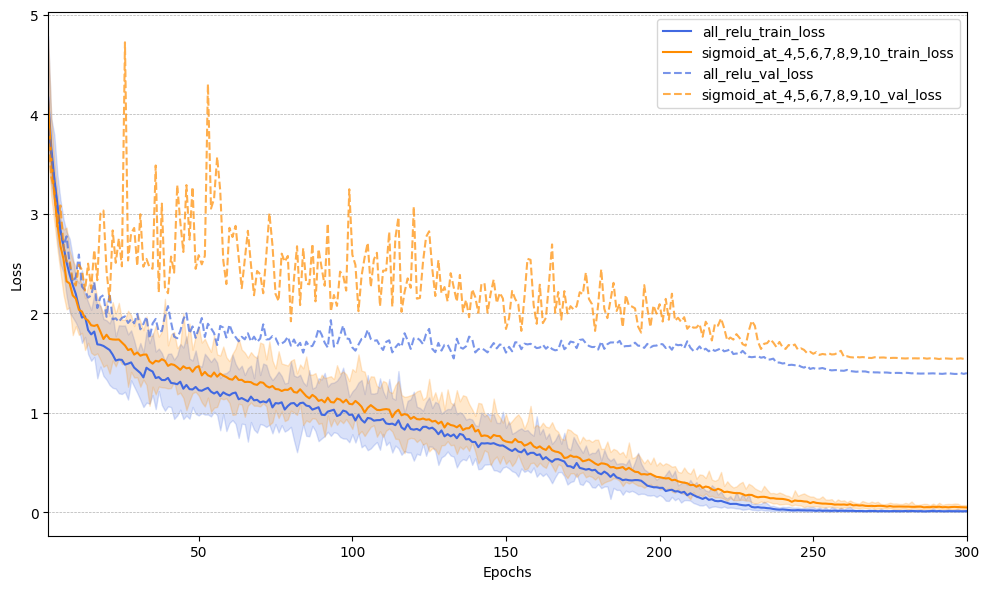

In [83]:
plot_train_val_loss_curves(task4_train_loss_df,
                           task4_val_loss_df,
                           task_ind='Task 4',
                           save=True,
                           save_dir='plots/')

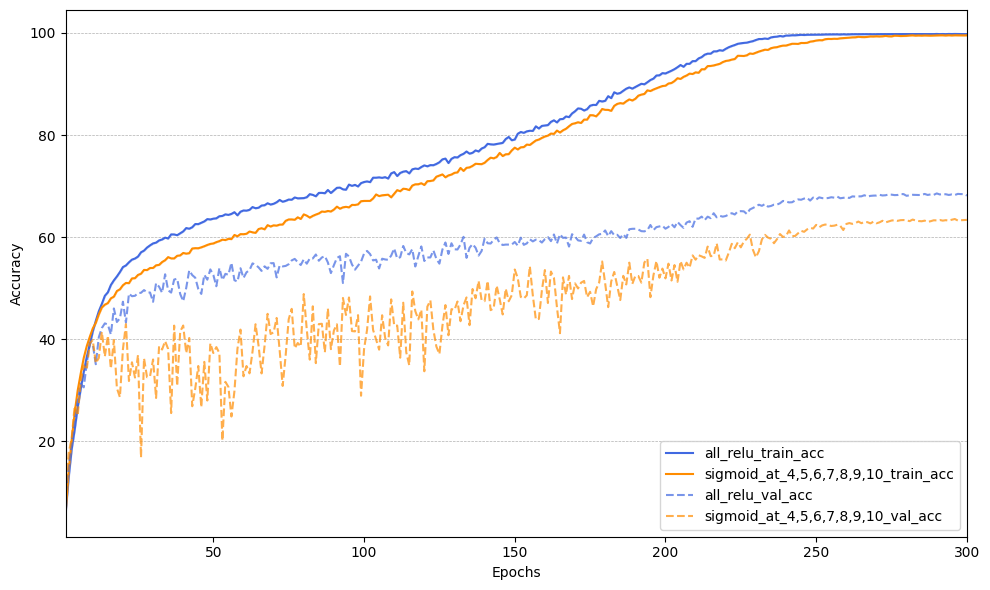

In [84]:
task4_train_accuracy_df = pd.read_csv('experiment_result/Task 4 - Train_Accuracy.csv', index_col=0)
task4_train_accuracy_df = task4_train_accuracy_df.iloc[:, [3, 4, 5, 9, 10, 11]]
task4_train_accuracy_df.columns = ['all_relu_mean', 'all_relu_min', 'all_relu_max',
                                    'sigmoid_at_4,5,6,7,8,9,10_mean', 'sigmoid_at_4,5,6,7,8,9,10_min', 'sigmoid_at_4,5,6,7,8,9,10_max']
plot_train_val_acc_curves(task4_train_accuracy_df,
                          task4_val_accuracy_df,
                          task_ind='Task 4',
                          save=True,
                          save_dir='plots/')